In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
cardioData = pd.read_csv('test.csv').drop('age', axis=1)
#cardioData = pd.read_csv('cardio.csv').drop('id', axis=1)

cardioData.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,year,cardio_bool
0,1,158,65.0,140,70,2,1,0,0,1,1,26.037494,56,Y
1,1,160,57.0,110,70,1,1,0,0,0,0,22.265625,54,N
2,2,167,75.0,140,80,1,1,0,0,1,1,26.892323,58,Y
3,2,170,58.0,140,90,1,1,0,0,1,1,20.069204,60,Y
4,1,164,65.0,120,80,1,1,0,0,1,0,24.167162,64,N


<AxesSubplot: >

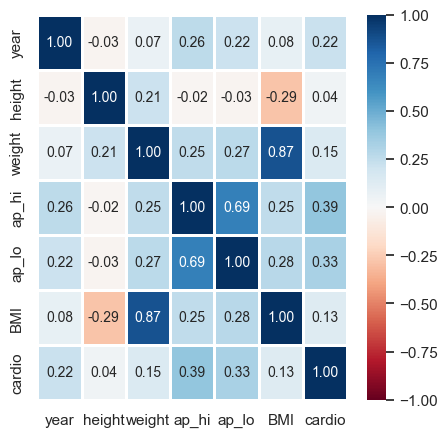

In [5]:
numericData = pd.DataFrame(cardioData[['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'cardio']])
f, axes = plt.subplots(1, 1, figsize=(5, 5))
sb.heatmap(numericData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7175

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.66

Predictions on the test set is [1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0]


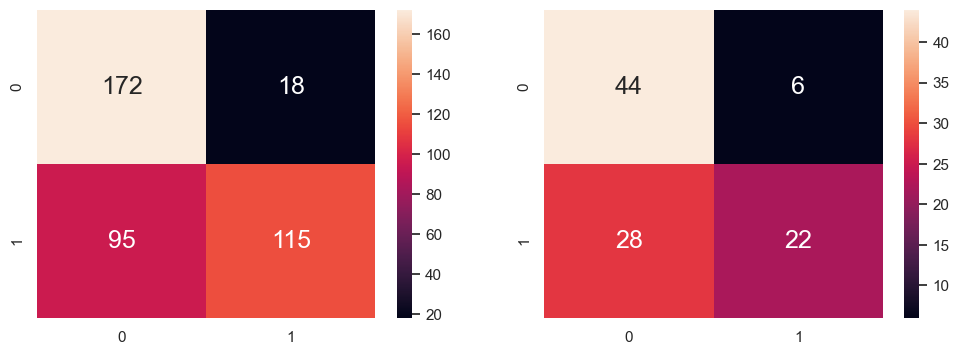

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Assuming your data is stored in a pandas DataFrame called df
X = cardioData[['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y = cardioData['cardio']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the decision tree classifier
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Make predictions on the test set
y_pred = clf.predict(X_test)
print("Predictions on the test set is", y_pred)


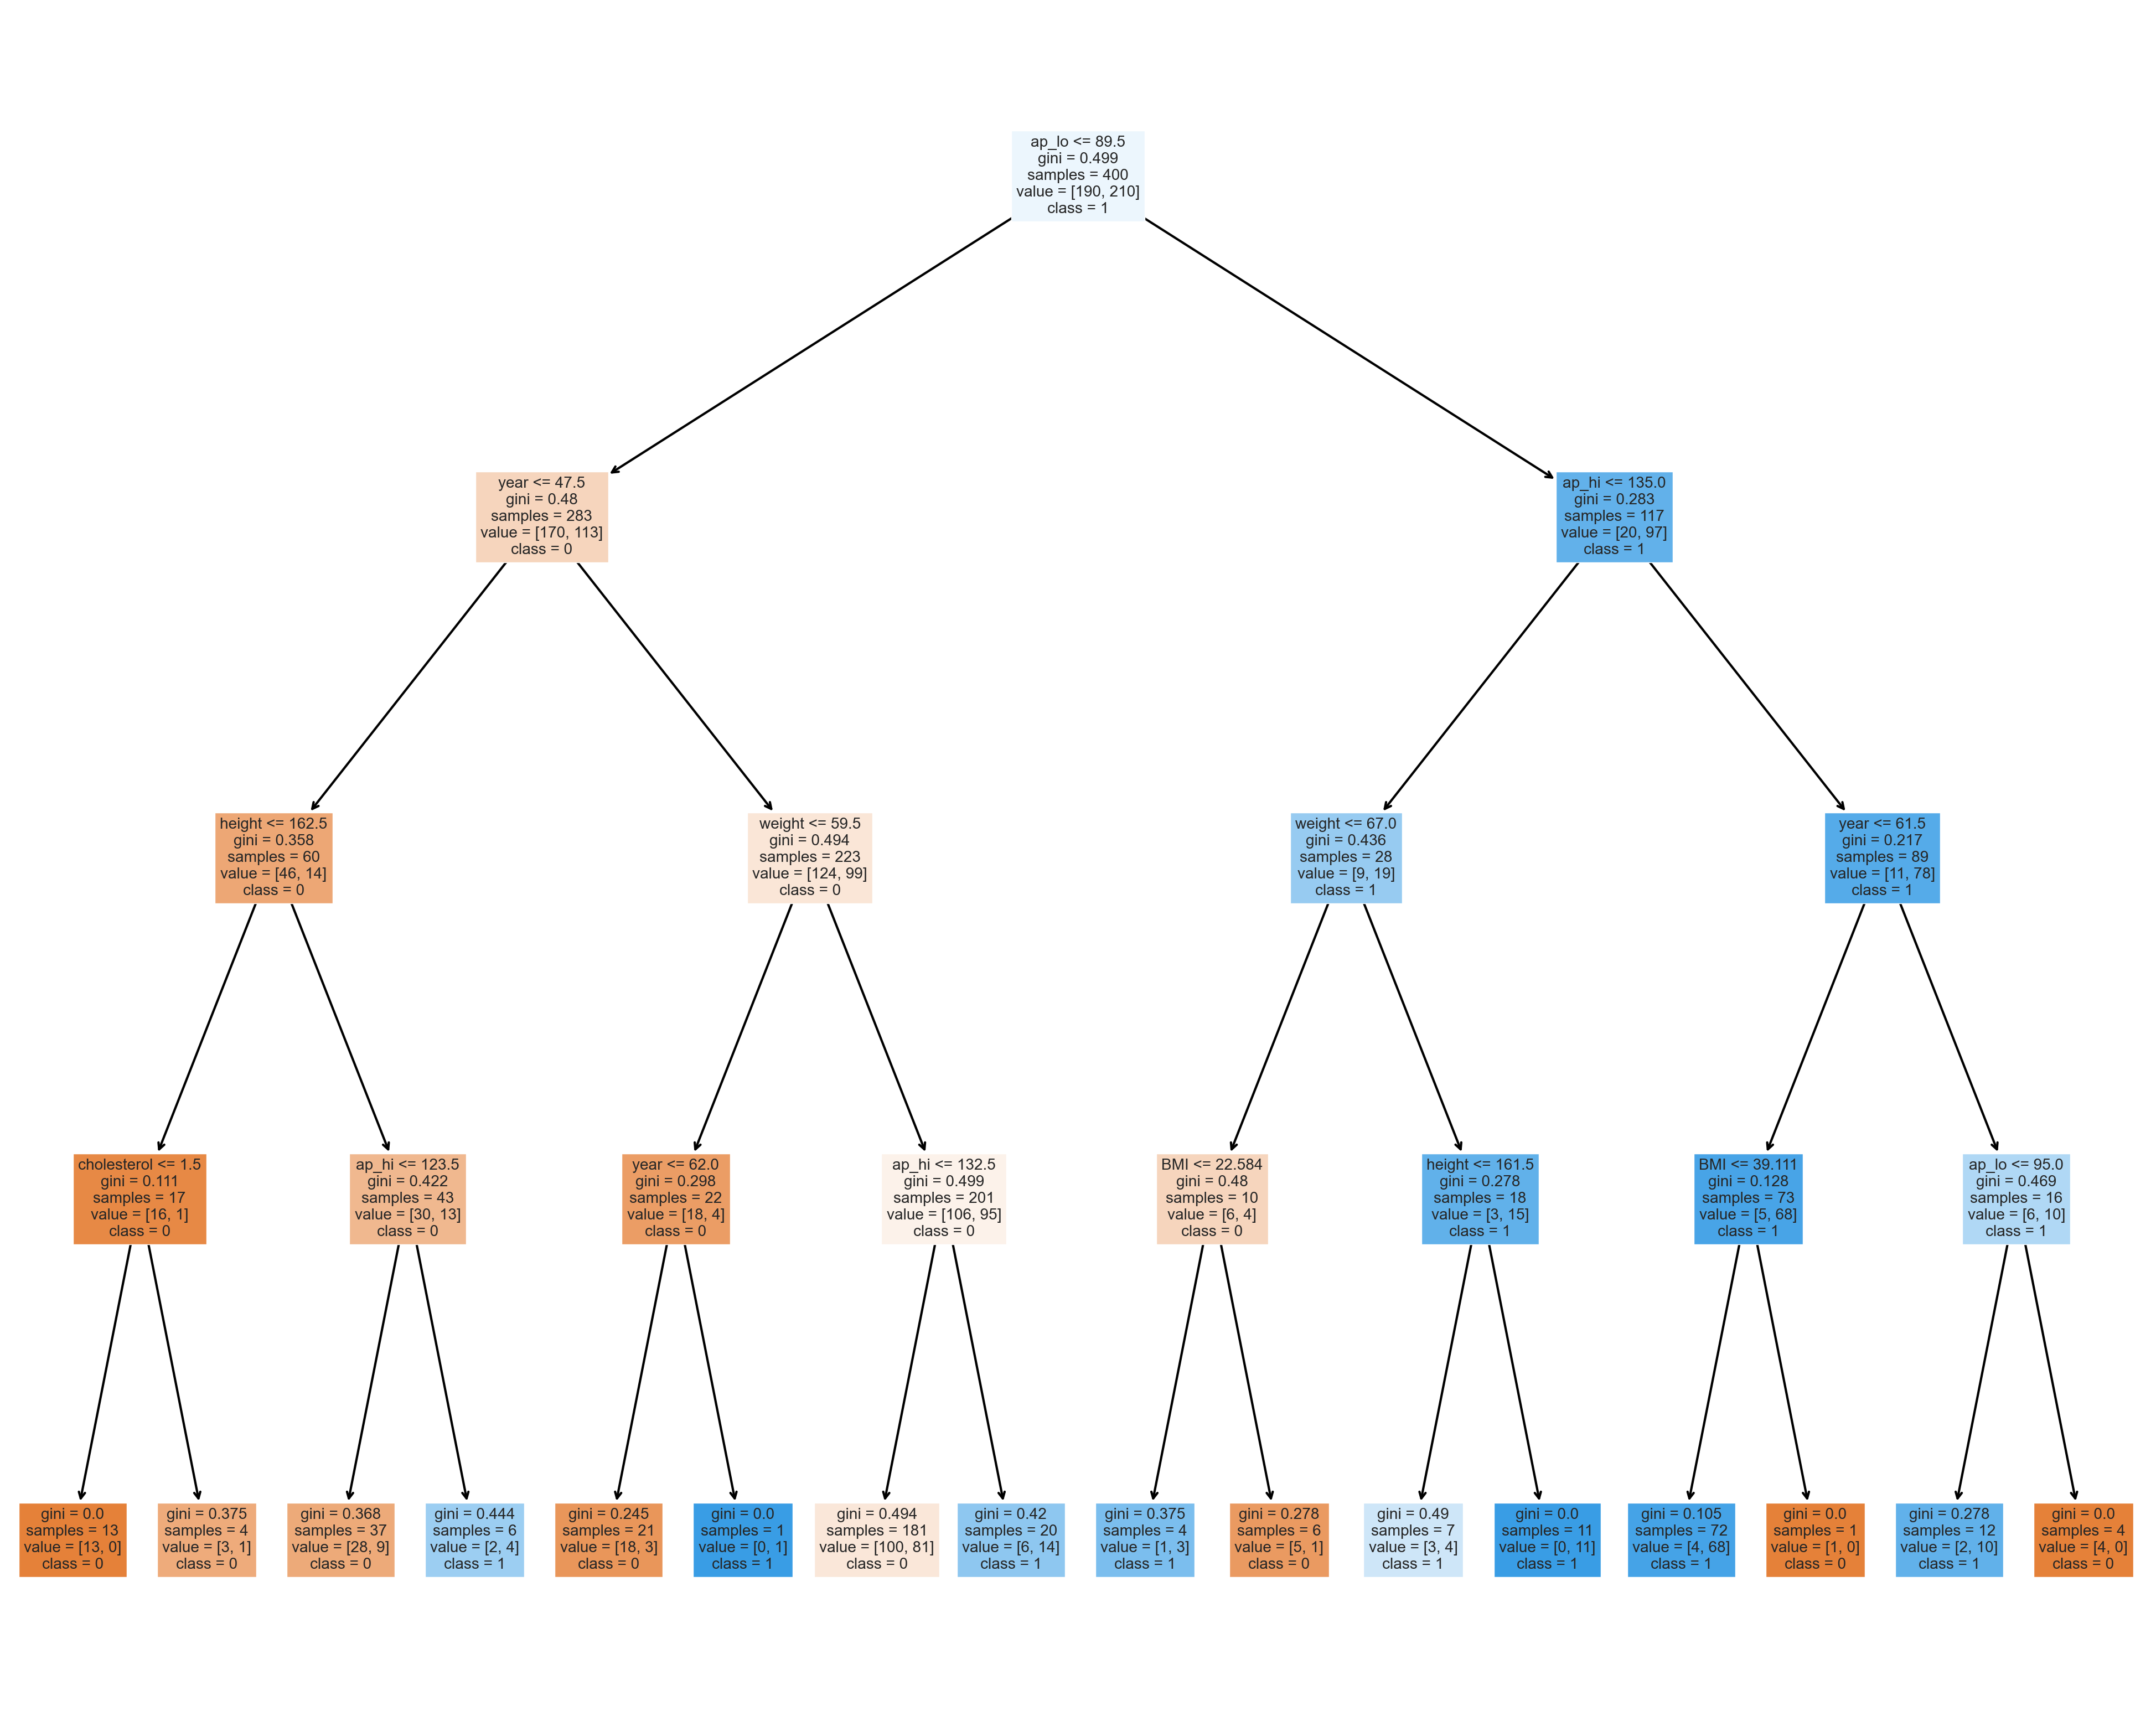

In [17]:
# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 40))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
                
plt.show()